
# Constant differential times

This example shows how to calculate the differential travel times of seismic
waves in a constant velocity model between two receivers. We first define the
model and the sources and receivers coordinates. We then calculate the travel
times for each receiver using the class
:func:`~covseisnet.travel_times.TravelTimes`, and we calculate the differential
travel times using the class
:func:`~covseisnet.travel_times.DifferentialTravelTimes`. Finally, we plot the
differential travel times on a map.


In [1]:
import covseisnet as csn

## Create a constant velocity model

We first create a constant velocity model with a velocity of 5 km/s. In order
to do so, we simply need to define the geographical extent of the model, the
resolution of the grid, and the velocity.



In [2]:
model = csn.velocity.VelocityModel(
    extent=(40, 41, 50, 51, 0, 20),
    shape=(20, 20, 20),
    velocity=3.5,
)

## Calculate the travel times between the sources and the receiver

Each grid point of the model is considered as a source and the receiver is
defined by the user. In the example below, the receiver is located at
coordinates (40.7, 50.2, 0), somewhere in the model's domain. The travel
times are calculated using the class
:class:`~covseisnet.travel_times.TravelTimes`.

We can then represent the travel times on a map using the method
:func:`~covseisnet.plot.grid3d`.



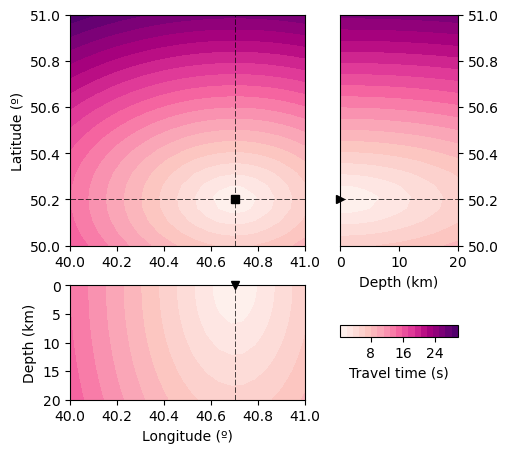

In [5]:
# Calculate the travel times
traveltime_1 = csn.travel_times.TravelTimes(
    model, receiver_coordinates=(40.7, 50.2, 0)
)

traveltime_2 = csn.travel_times.TravelTimes(
    model, receiver_coordinates=(40.2, 50.9, 0)
)

# Plot the traveltime grid
fig, ax = csn.plot.grid3d(
    traveltime_1,
    cmap="RdPu",
    label="Travel time (s)",
    vmin=0,
)

Differential travel times
-------------------------

The differential travel times are calculated using the class
:class:`~covseisnet.travel_times.DifferentialTravelTimes`. The differential
travel times are calculated between the two receivers defined above, and
shown on a map using the function :func:`~covseisnet.plot.grid3d`.



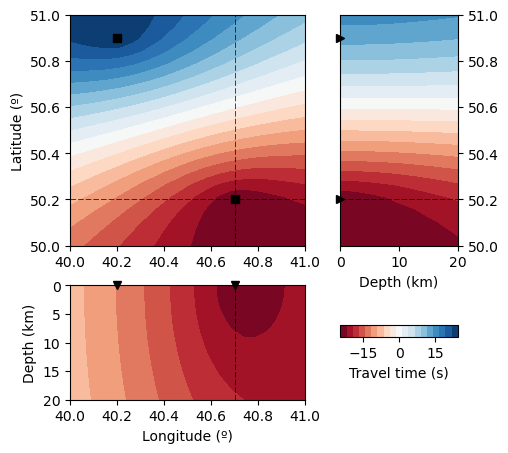

In [7]:
# Calculate the differential travel times
differential_traveltime = csn.travel_times.DifferentialTravelTimes(
    traveltime_1, traveltime_2
)

# Plot the differential traveltime grid
fig, ax = csn.plot.grid3d(differential_traveltime, label="Travel time (s)")